<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PG/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# read in the data
df = pd.read_csv('/content/sample_data/dataset1_combined.csv')

df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx


In [4]:
df.tail()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
8412,8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail _x000D_\n_x0...,emails not coming in from zz mail _x000D_\n_x0...
8413,8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,telephony_software issue telephony_software is...
8414,8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8415,8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...
8416,8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...


In [5]:
# Generic function to derive top N n-grams from the corpus
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

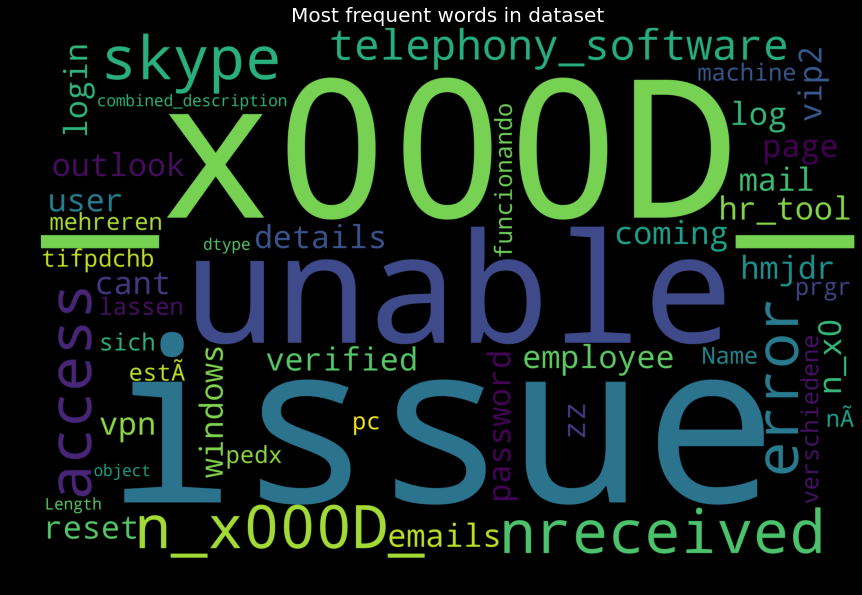

In [6]:

# importing ploting libraries
import matplotlib.pyplot as plt 
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)

# generate word cloud for data
wc_word=wc.generate(str(df.combined_description))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [7]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models


     |████████████████████████████████| 1.7 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 52.0 MB/s 
     |████████████████████████████████| 15.7 MB 60 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=2bc672a69d1d9d3894694ea23528f9968c58bab8ae5c3bd75f868b30e4df6b9a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [9]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df.combined_description))

In [11]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [12]:
print(bigram_mod[data_words[1]])

['outlook', 'd_', 'd_', 'received', 'from', 'hmjdrvpb', 'komuaywn', 'gmail', 'com_x', 'd_', 'd_', 'hello', 'team', 'd_', 'd_', 'my', 'meetings', 'skype', 'meetings', 'etc', 'are', 'not', 'appearing', 'in', 'my', 'outlook', 'calendar', 'can', 'somebody', 'please', 'advise', 'how', 'to', 'correct', 'this', 'd_', 'd_', 'kind']


In [13]:
print(trigram_mod[data_words[1]])

['outlook', 'd_', 'd_', 'received', 'from', 'hmjdrvpb', 'komuaywn', 'gmail', 'com_x', 'd_', 'd_', 'hello', 'team', 'd_', 'd_', 'my', 'meetings', 'skype', 'meetings', 'etc', 'are', 'not', 'appearing', 'in', 'my', 'outlook', 'calendar', 'can', 'somebody', 'please', 'advise', 'how', 'to', 'correct', 'this', 'd_', 'd_', 'kind']


In [14]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [15]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:

wordclouds=' '.join(map(str, data_words_trigrams))

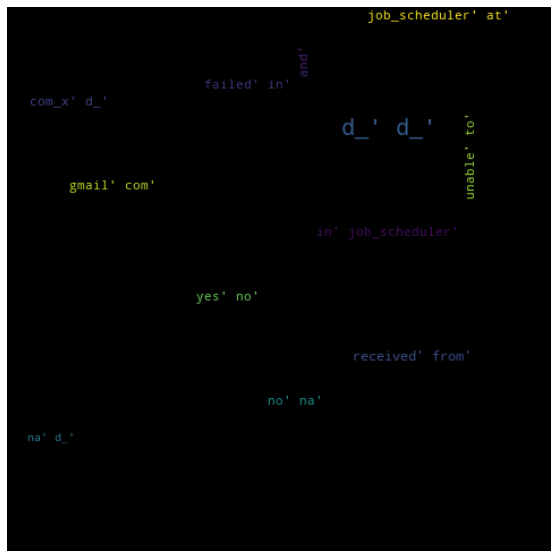

In [18]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [19]:
#Copying to new dataframe to create wordclouds on target class

new_df = df.copy()
new_df['words'] = data_words_trigrams
new_df

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller,words
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,"[login, issue, verified, user, details_employe..."
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,"[outlook, d_, d_, received, from, hmjdrvpb, ko..."
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,"[cant, log, in, to, vpn, d_, d_, received, fro..."
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,"[unable, to, access, hr_tool, page, unable, to..."
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx,"[skype, error, skype, error]"
...,...,...,...,...,...,...,...,...
8412,8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail _x000D_\n_x0...,emails not coming in from zz mail _x000D_\n_x0...,"[emails, not, coming, in, from, zz, mail, d_, ..."
8413,8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,telephony_software issue telephony_software is...,"[issue, issue]"
8414,8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,"[vip, windows, password, reset, for, tifpdchb,..."
8415,8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...,"[machine, na, esta, funcionando, am, unable, t..."


In [20]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_48', 'GRP_62', 'GRP_23', 'GRP_39', 'GRP_27',
       'GRP_37', 'GRP_60', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_59', 'GRP_46', 'GRP_49', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_56', 'GRP_68', 'GRP_58', 'GRP_38', 'GRP_63',
       'GRP_54', 'GRP_72', 'GRP_71', 'GRP_57', 'GRP_69', 'GRP_73', 'GRP_35',
       'GRP_61', 'GRP_64', 'GRP_67', 'GRP_70'],
      dtype='object')

In [21]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

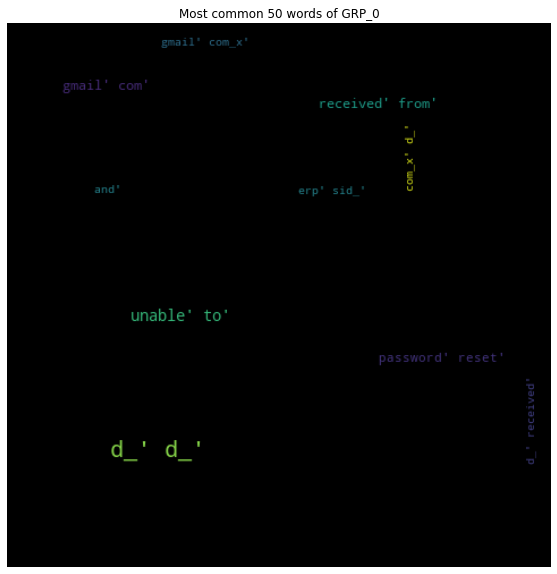

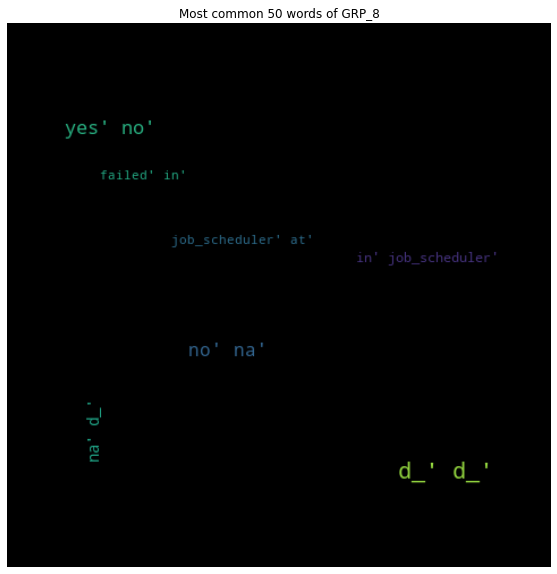

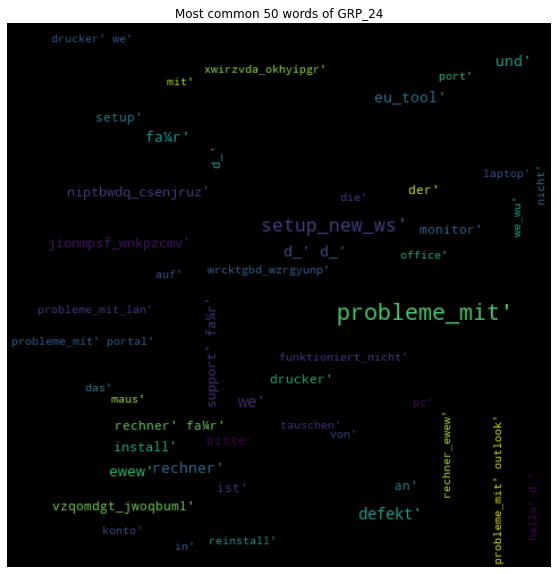

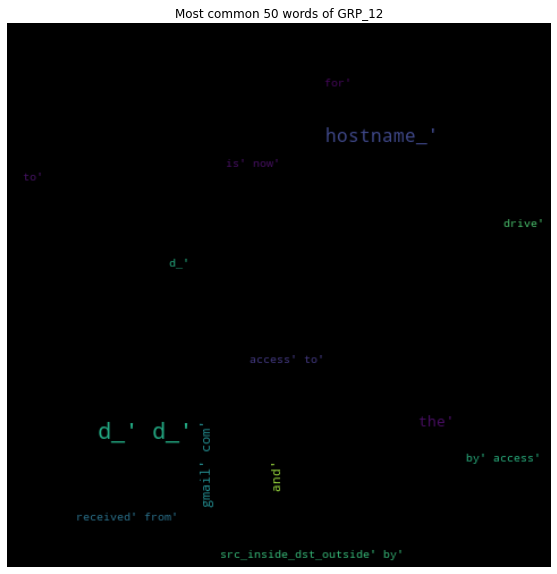

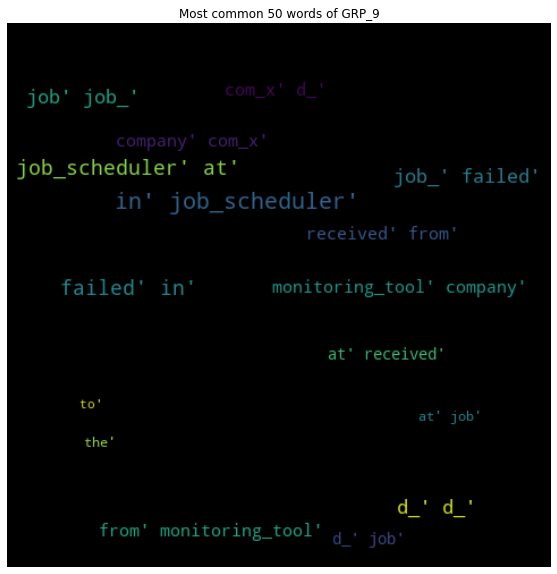

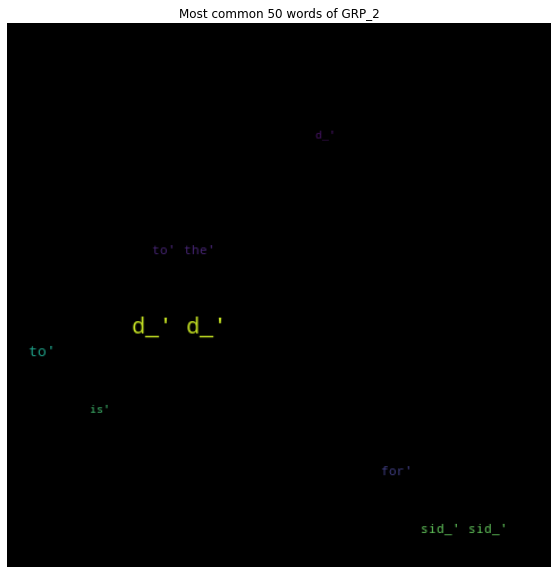

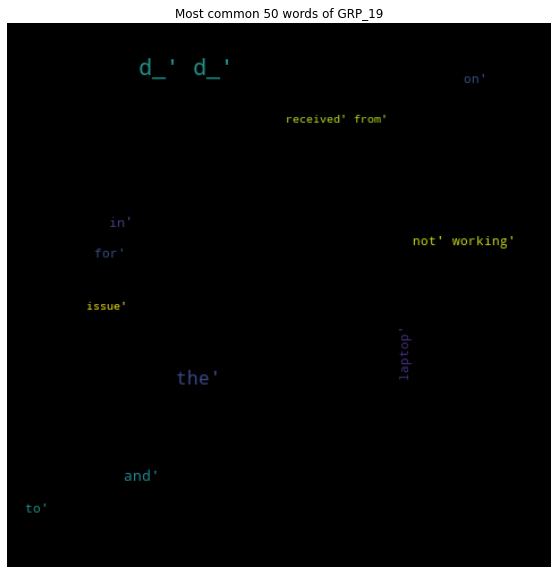

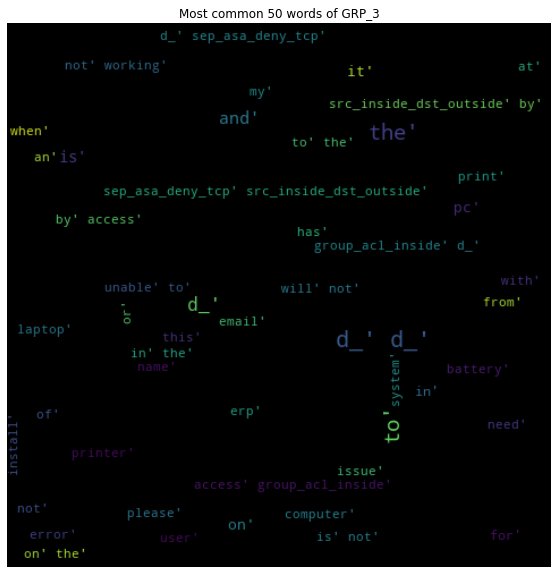

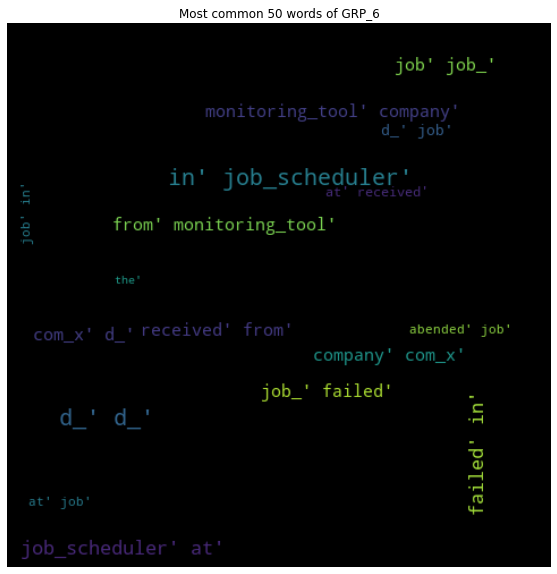

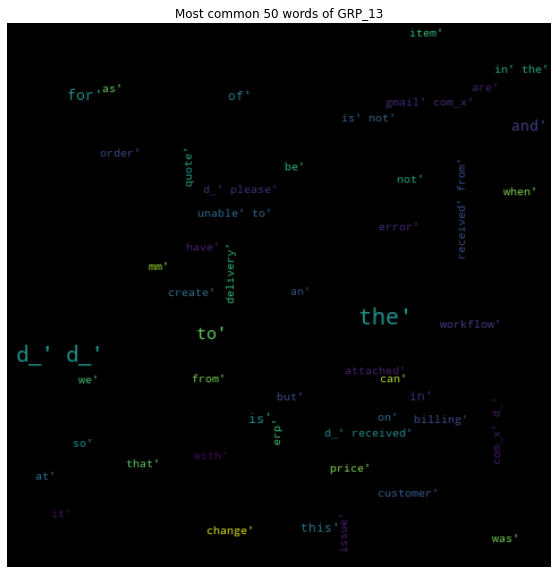

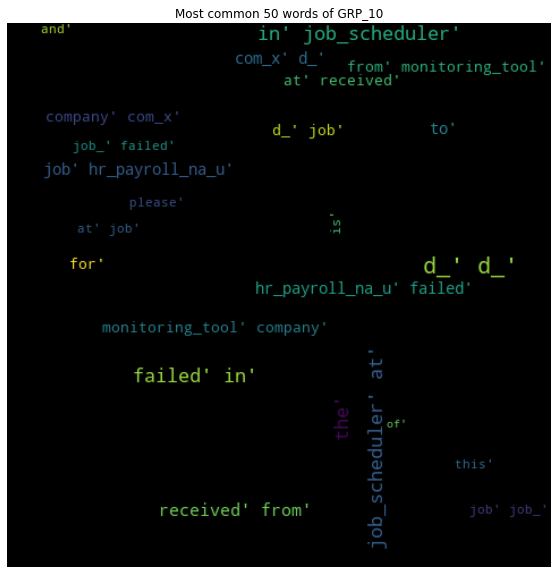

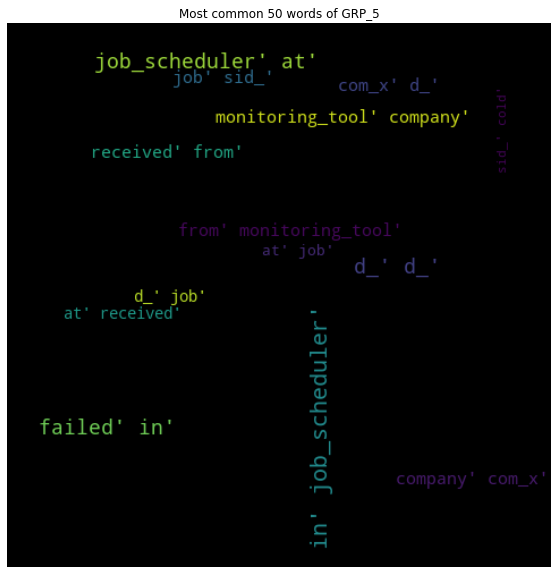

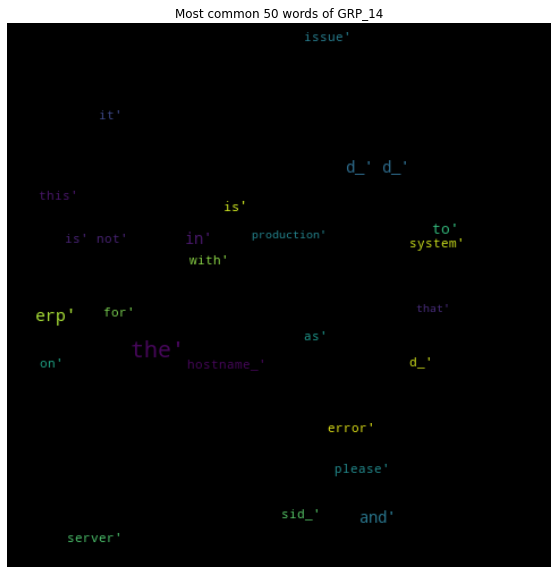

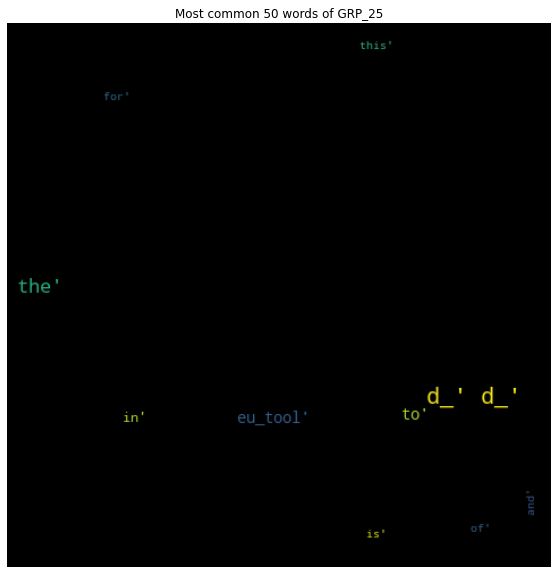

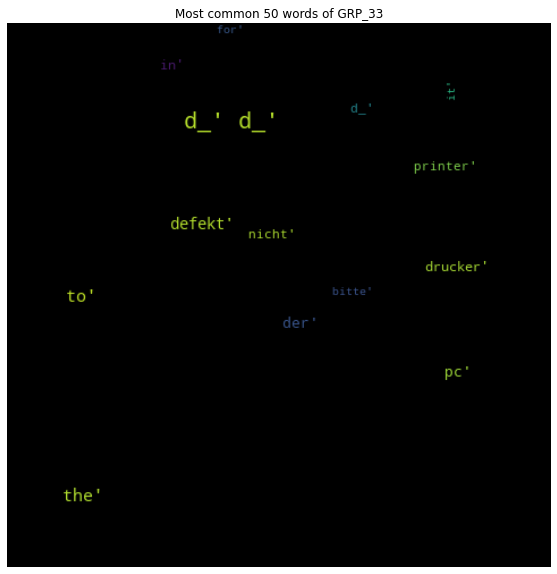

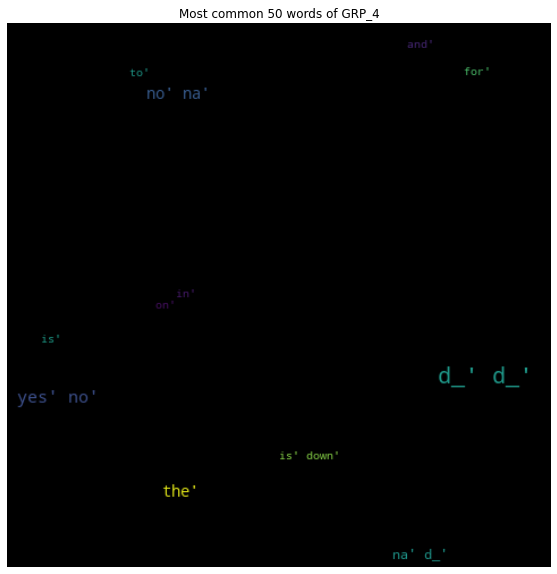

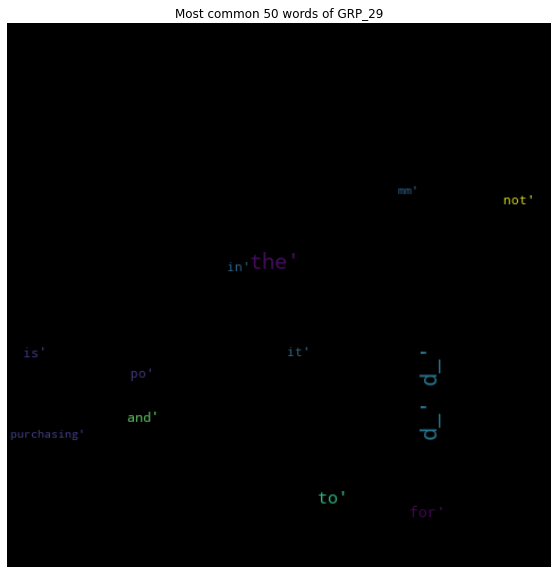

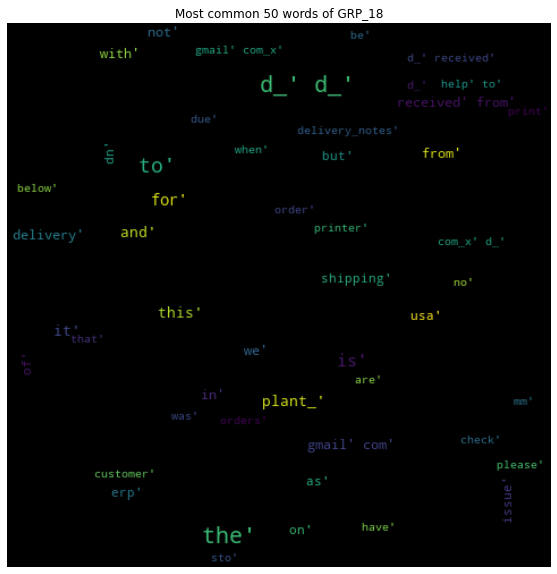

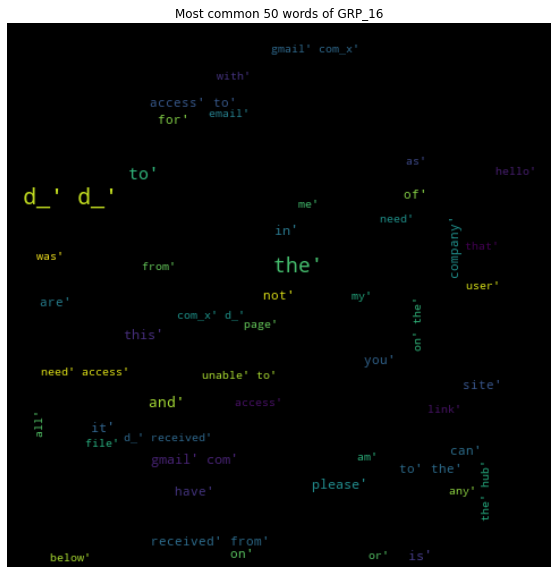

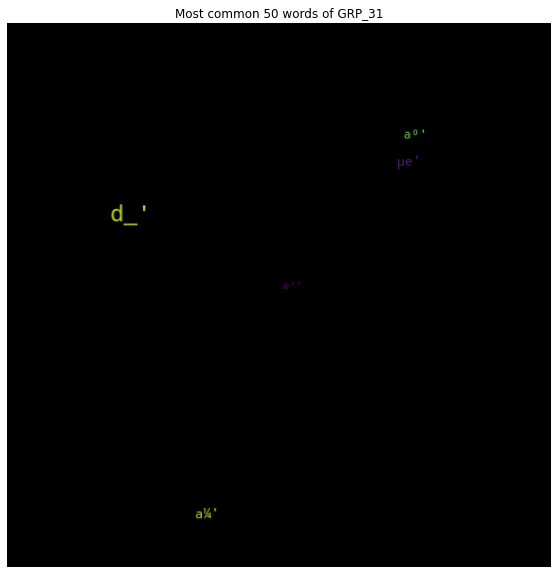

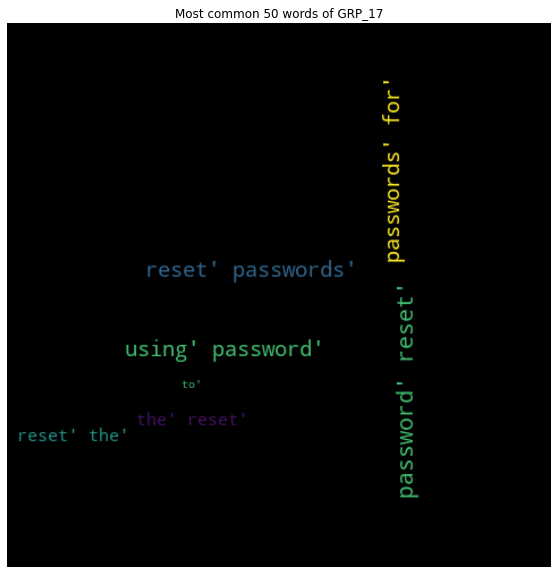

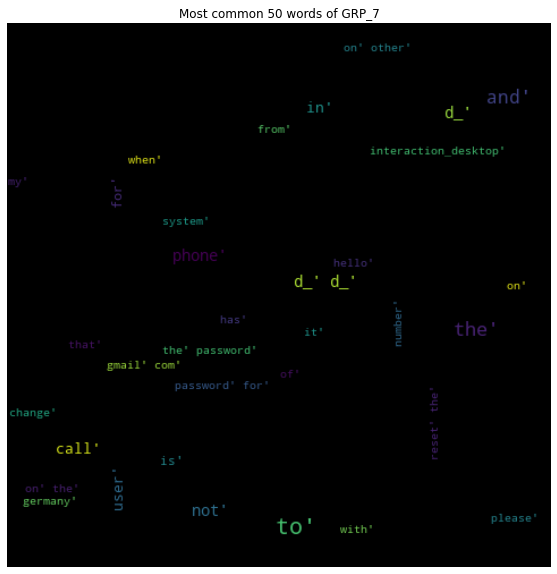

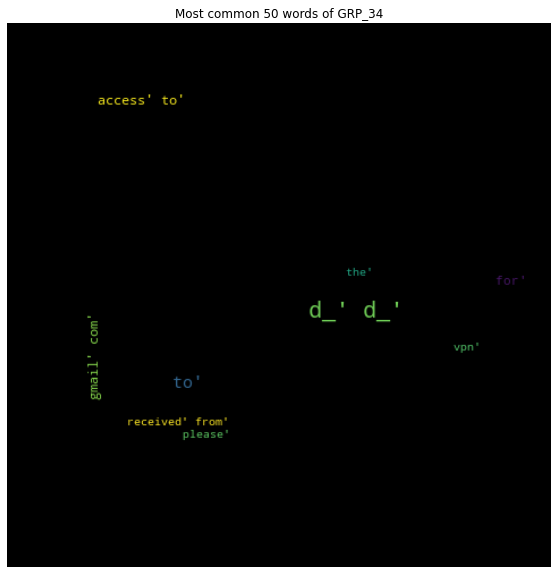

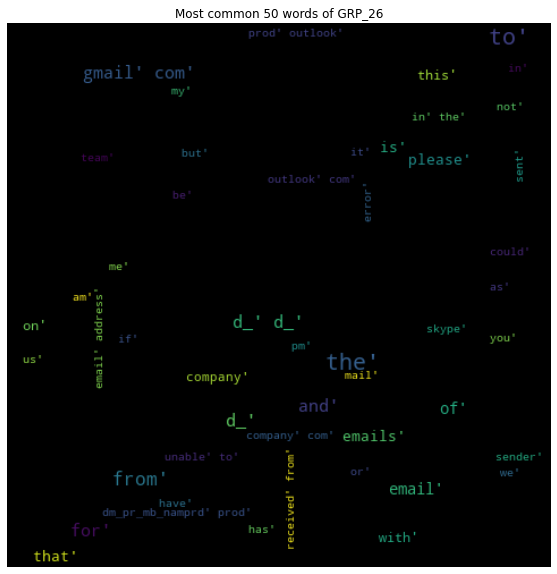

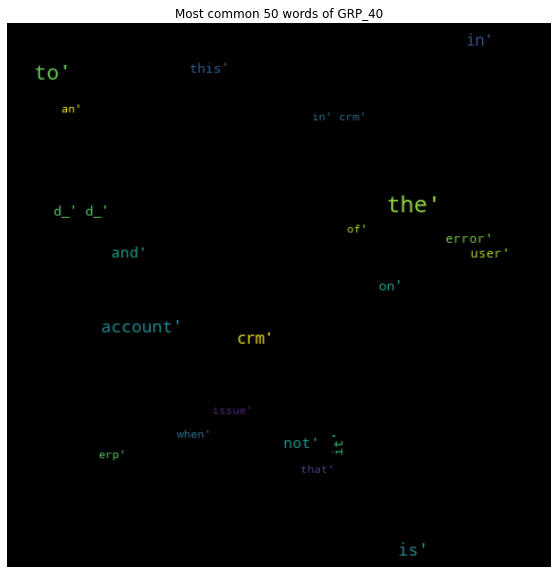

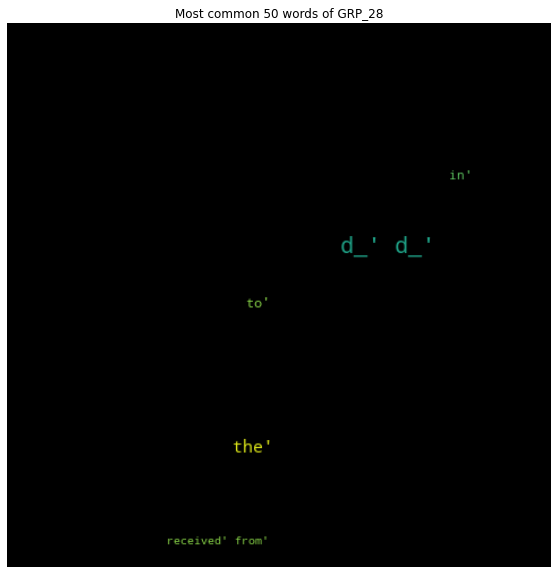

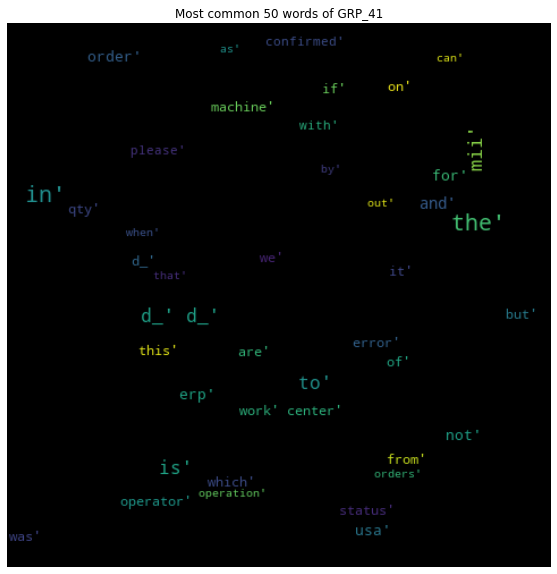

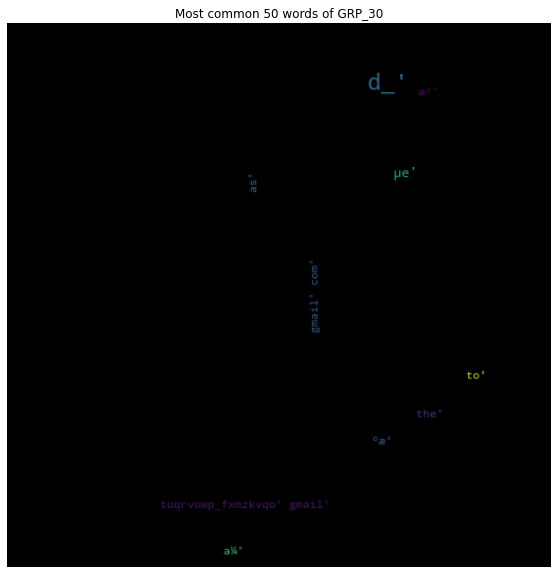

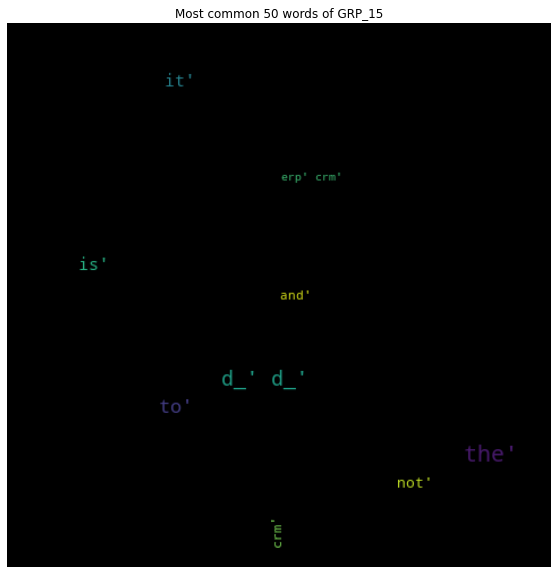

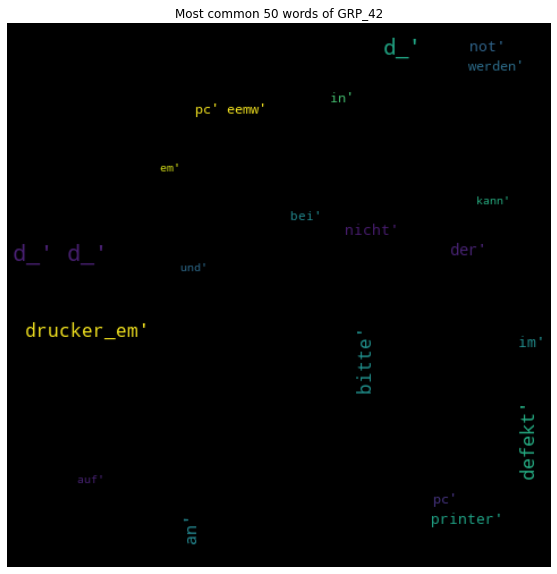

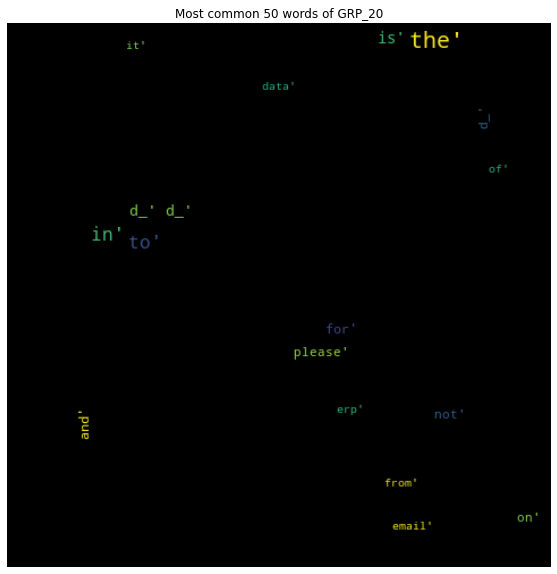

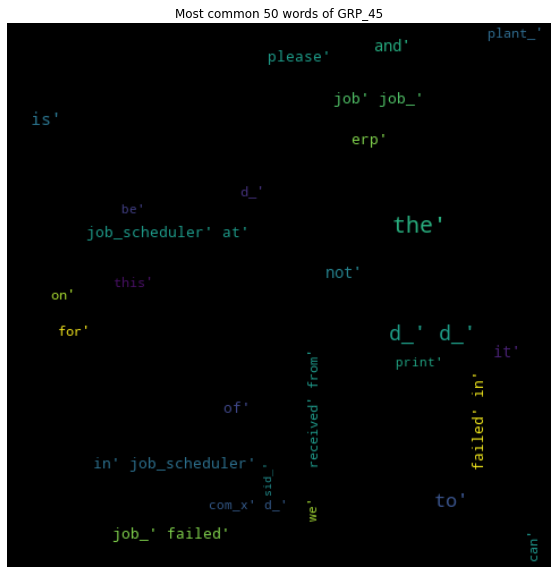

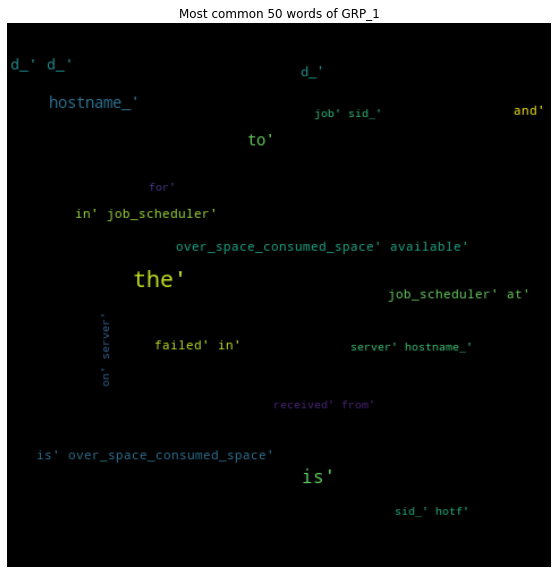

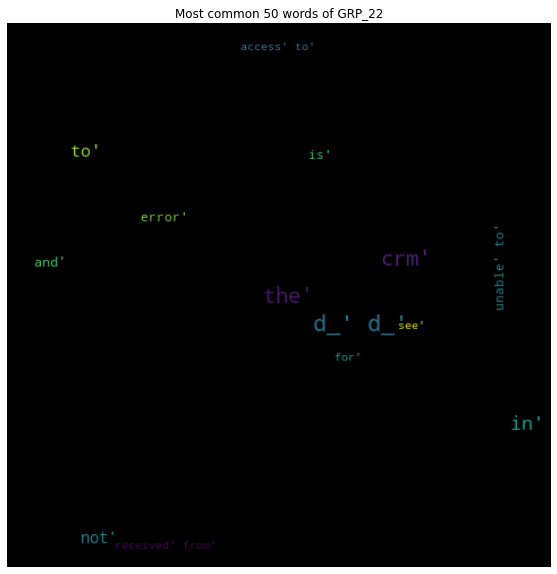

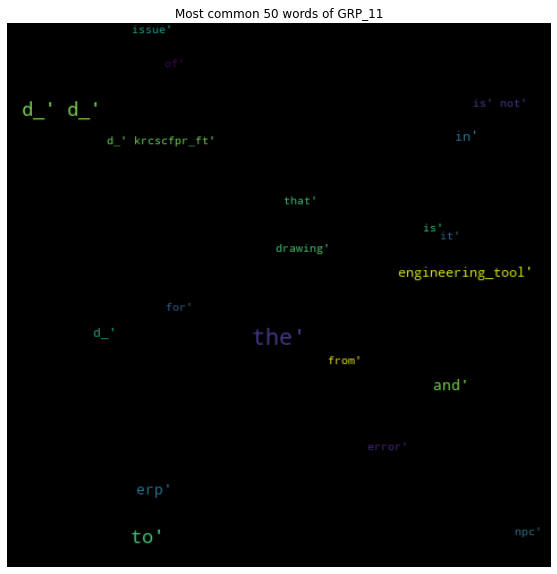

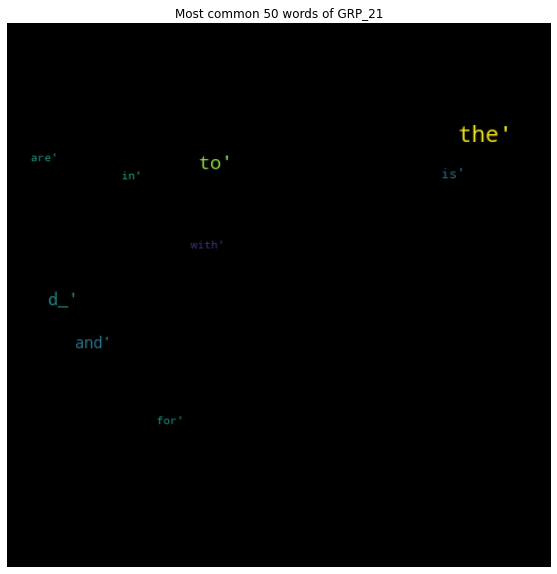

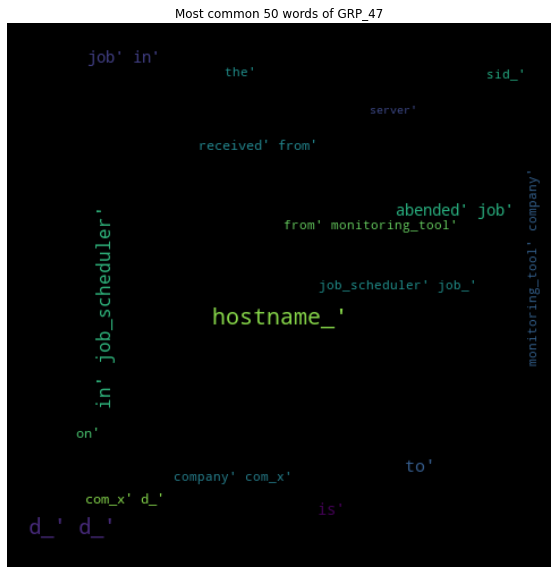

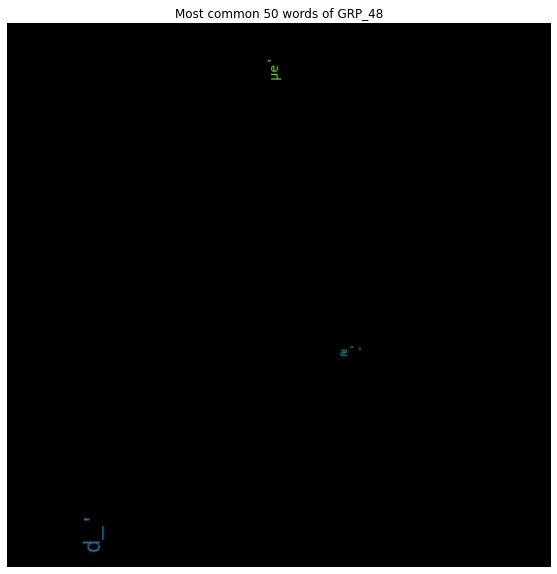

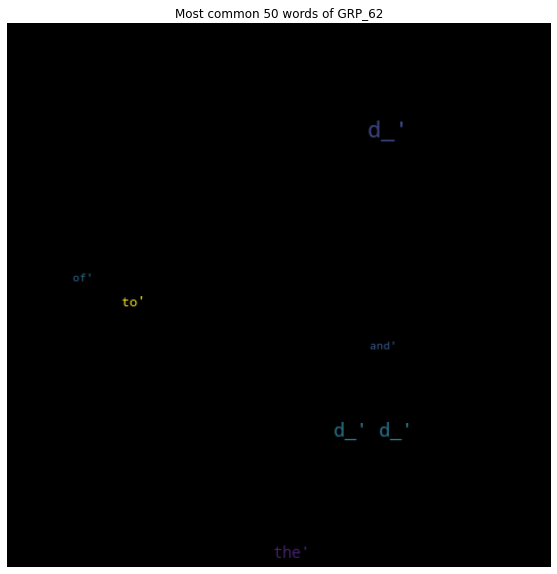

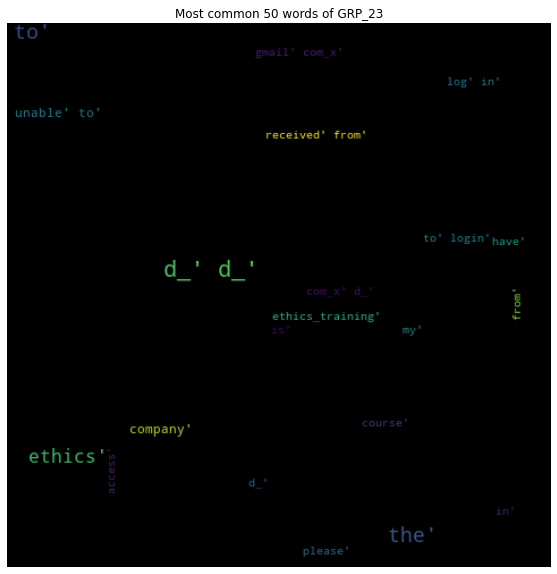

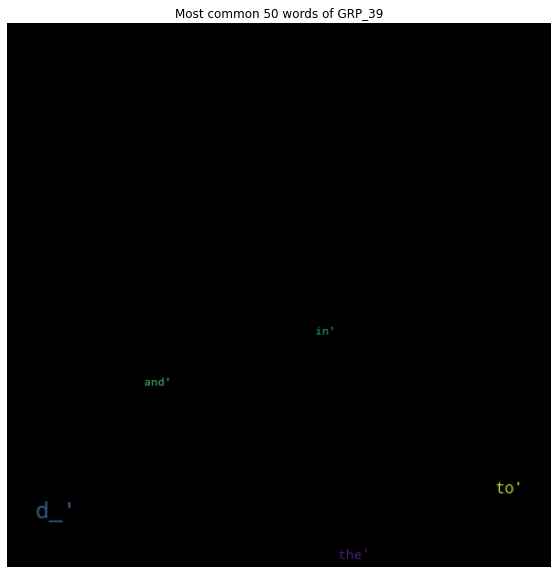

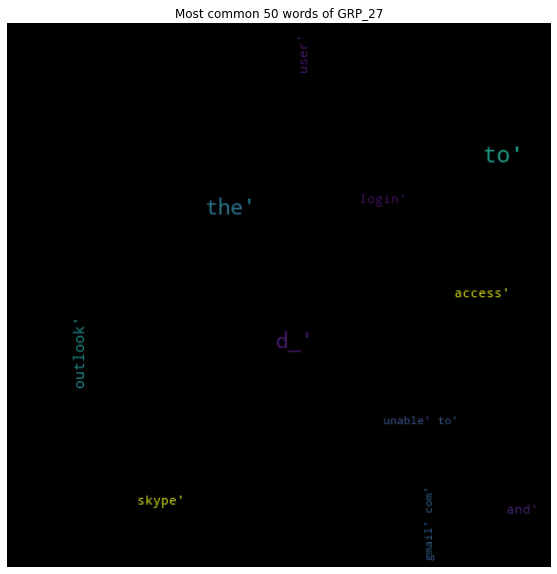

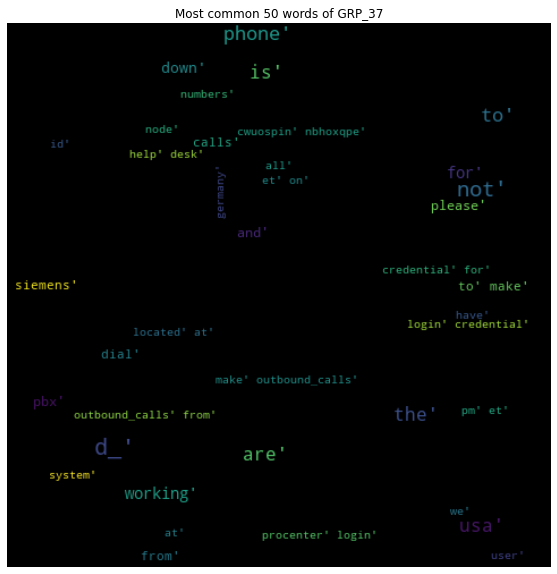

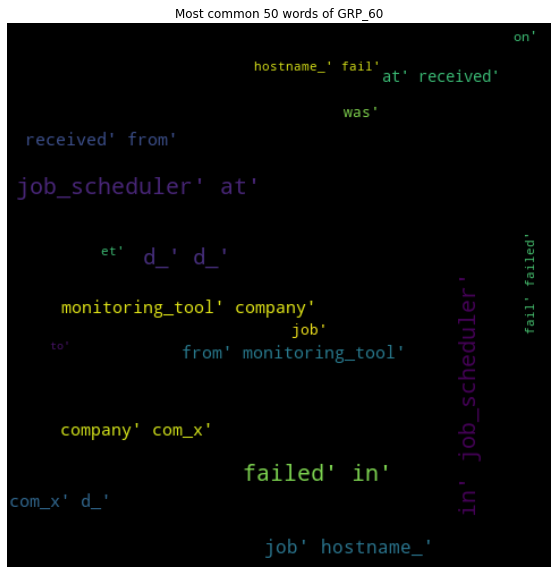

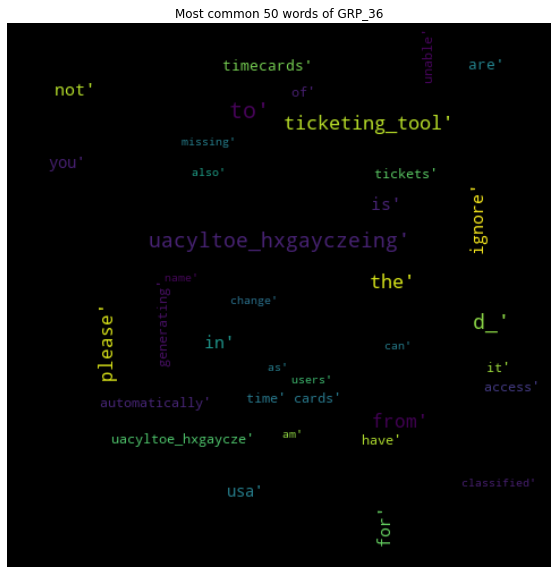

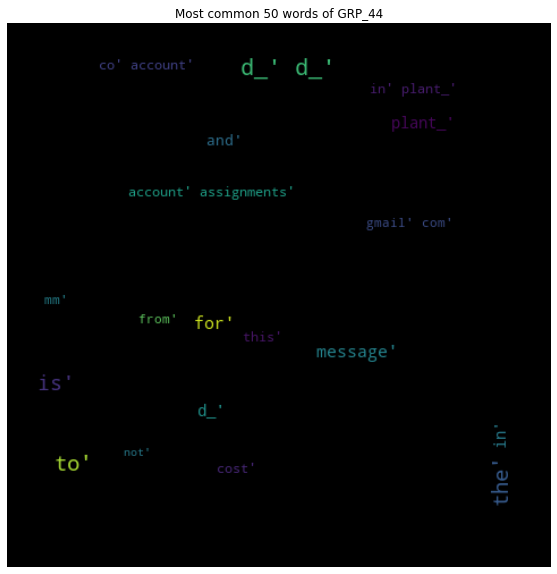

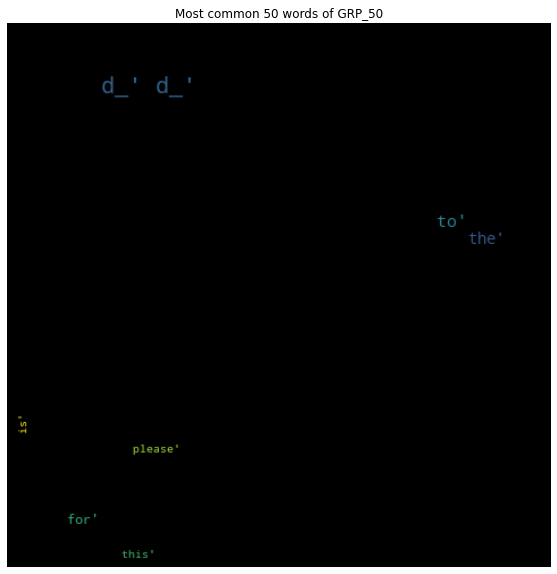

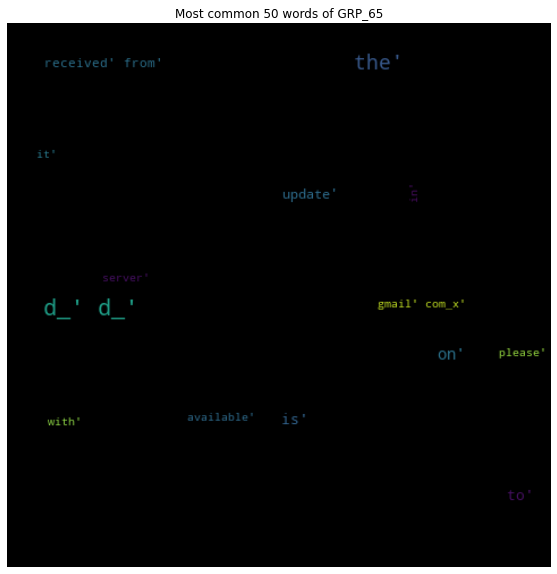

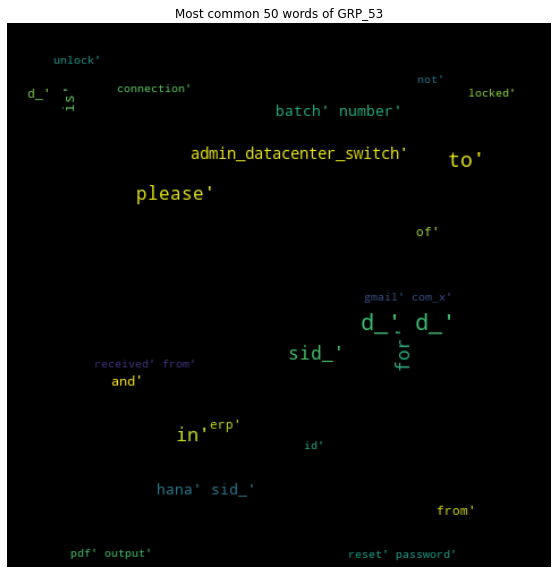

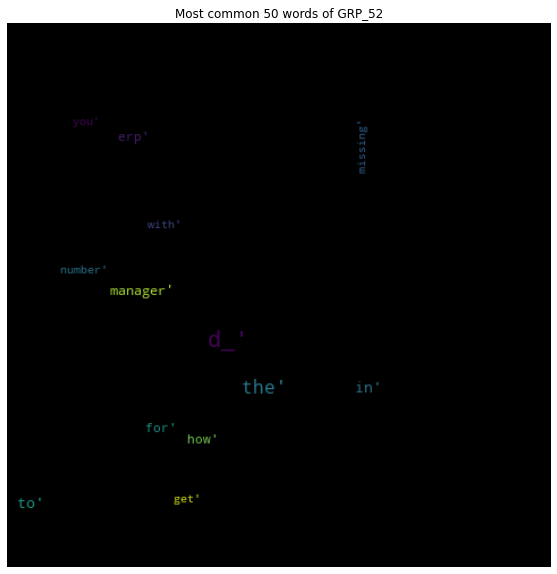

In [23]:
#for loop to pass the top 50 Assignment groups

for i in range(50):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [9]:
def generate_word_clod(corpus):
    # mask = np.array(Image.open('cloud2.png'))
    # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=STOP_WORDS,
                    # mask=mask,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [10]:
# Word Cloud for all tickets assigned to GRP_0
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_0'].Summary.str.strip()))

AttributeError: ignored